In [2]:
import pandas as pd
import numpy as np
from astropy.io import fits


from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular


from datetime import datetime, date, timezone
from datetime import datetime
from datetime import timedelta
from astropy.time import Time
from astropy.io import ascii

import time
import os
from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord

from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
#import matplotlib.cm as cm
import matplotlib.colors as colors
from collections import OrderedDict



from astropy.io import fits 
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import cm
from astropy.table import Table
from collections import OrderedDict
from adjustText import adjust_text

In [18]:
from astropy import config as _config
from astroquery.irsa import Irsa 

from astroquery.ned import Ned


In [23]:
Irsa.print_catalogs()

allwise_p3as_psd                AllWISE Source Catalog
allwise_p3as_mep                AllWISE Multiepoch Photometry Table
allwise_p3as_psr                AllWISE Reject Table
allwise_p3as_cdd                AllWISE Atlas Metadata Table
allwise_p3am_xrf                AllWISE Frame Cross-Reference Table
allwise_p3al_lod                AllWISE Atlas Inventory Table
allwise_p3am_cdd                AllWISE Atlas Image Inventory Table
allwise_mfpos                   AllWISE Refined Pointing Information for the Single-exposure Images
neowiser_p1bs_psd               NEOWISE-R Single Exposure (L1b) Source Table
neowiser_p1ba_mch               NEOWISE-R Known Solar System Object Possible Association List ( Caution )
neowiser_p1bs_frm               NEOWISE-R Single Exposure (L1b) Frame Metadata Table
neowiser_p1bl_lod               NEOWISE-R Single Exposure (L1b) Scan Inventory Table
neowiser_p1bm_frm               NEOWISE-R Single Exposure (L1b) Image Inventory Table
allsky_4band_p3as_psd     

# ZTF

The Zwicky Transient Facility (ZTF) is a new time-domain survey that had first light at Palomar Observatory in 2017

In [26]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

name='Mrk 6'
search_name=name.replace(' ','')
save_name=name

if not os.path.exists('/Users/brettlv/Downloads/Mrk6/ztf_objects_dr7_%s.csv'%save_name):
    print(search_name)
    Irsa.ROW_LIMIT = 1000
    Irsa.TIMEOUT = 120
    table_ztf_objects_dr7 =Irsa.query_region(search_name,catalog='ztf_objects_dr7',spatial='Cone',radius=10*u.arcsec,)
    table_ztf_objects_dr7.write('/Users/brettlv/Downloads/Mrk6/ztf_objects_dr7_%s.csv'%save_name, format='csv')
    time.sleep(15+np.random.randint(5,10))    



Mrk6


In [30]:
ztf_hdl.info()

Filename: /Users/brettlv/Downloads/Mrk6/858103200005784lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  Table         1 BinTableHDU     74   327R x 25C   [3B, 1K, 1J, 1D, 1D, 1E, 1E, 1J, 2A, 1D, 1D, 1E, 1E, 1K, 1J, 1B, 1B, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1J]   


In [ ]:
ztf_hdl.info()

In [34]:
ztf_hdl[1].columns

ColDefs(
    name = 'null_bitfield_flags'; format = '3B'
    name = 'oid'; format = '1K'
    name = 'expid'; format = '1J'
    name = 'hjd'; format = '1D'; unit = 'd'
    name = 'mjd'; format = '1D'; unit = 'd'
    name = 'mag'; format = '1E'; unit = 'mag'
    name = 'magerr'; format = '1E'; unit = 'mag'
    name = 'catflags'; format = '1J'
    name = 'filtercode'; format = '2A'
    name = 'ra'; format = '1D'; unit = 'deg'
    name = 'dec'; format = '1D'; unit = 'deg'
    name = 'chi'; format = '1E'
    name = 'sharp'; format = '1E'
    name = 'filefracday'; format = '1K'
    name = 'field'; format = '1J'
    name = 'ccdid'; format = '1B'
    name = 'qid'; format = '1B'
    name = 'limitmag'; format = '1E'; unit = 'mag'
    name = 'magzp'; format = '1E'; unit = 'mag'
    name = 'magzprms'; format = '1E'; unit = 'mag'
    name = 'clrcoeff'; format = '1E'
    name = 'clrcounc'; format = '1E'
    name = 'exptime'; format = '1E'; unit = 's'
    name = 'airmass'; format = '1E'
    name = 'p

In [ ]:
## 

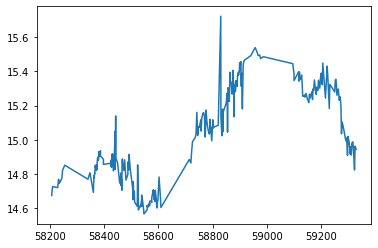

In [36]:
ztf_data=ztf_hdl[1].data
plt.plot(ztf_data['mjd'],ztf_data['mag'])

# PTF

In [33]:
name='Mrk 6'
search_name=name.replace(' ','')
save_name=name

if not os.path.exists('/Users/brettlv/Downloads/Mrk6/ptf_lightcurves_%s.csv'%save_name):
    print(search_name)
    Irsa.ROW_LIMIT = 1000
    Irsa.TIMEOUT = 120
    table_ztf_objects_dr7 =Irsa.query_region(search_name,catalog='ptf_lightcurves',spatial='Cone',radius=10*u.arcsec,)
    table_ztf_objects_dr7.write('/Users/brettlv/Downloads/Mrk6/ptf_lightcurves_%s.csv'%save_name, format='csv')
    time.sleep(15+np.random.randint(5,10))    


In [32]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

name='Mrk 6'
search_name=name.replace(' ','')
save_name=name

if not os.path.exists('/Users/brettlv/Downloads/Mrk6/ptf_sources_%s.csv'%save_name):
    print(search_name)
    Irsa.ROW_LIMIT = 1000
    Irsa.TIMEOUT = 120
    table_ztf_objects_dr7 =Irsa.query_region(search_name,catalog='ptf_sources',spatial='Cone',radius=10*u.arcsec,)
    table_ztf_objects_dr7.write('/Users/brettlv/Downloads/Mrk6/ptf_sources_%s.csv'%save_name, format='csv')
    time.sleep(15+np.random.randint(5,10))    



Mrk6


# pos

In [19]:
name='Mrk 6'
result_table = Ned.query_object(name)

In [22]:
result_table['Redshift'].data[0],result_table['RA'].data[0],result_table['DEC'].data[0]

(0.019513, 103.05105, 74.42707)

In [1]:
def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [3]:
Monitoring_AGNs_Du=pd.read_csv('/Users/brettlv/blog/IHEP_sync/data/Mrk6_lc_data/Mrk6.txt',delimiter='\s+',header=None)

JD-2,457,700

In [4]:
Monitoring_AGNs_Du.columns=['Na','me','jd','F5100','e_F5100','FHb','e_FHb']

In [5]:
Monitoring_AGNs_Du['Name']=Monitoring_AGNs_Du['Na']+Monitoring_AGNs_Du['me']

In [6]:
Mrk6=Monitoring_AGNs_Du[Monitoring_AGNs_Du['Name']=='Mrk6']

In [7]:
Mrk6['mjd']=Mrk6['jd']+2457700-2400000.5

<ipython-input-7-05305712e40f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mrk6['mjd']=Mrk6['jd']+2457700-2400000.5


In [9]:
Mrk6=drop_index(Mrk6)

In [10]:
Mrk6

,Na,me,jd,F5100,e_F5100,FHb,e_FHb,Name,mjd
0,Mrk,6,52.6986,12.411,0.037,10.946,0.031,Mrk6,57752.1986
1,Mrk,6,53.7266,12.536,0.019,11.020,0.016,Mrk6,57753.2266
2,Mrk,6,54.7462,12.494,0.035,11.029,0.032,Mrk6,57754.2462
3,Mrk,6,71.6696,12.479,0.040,11.291,0.032,Mrk6,57771.1696
4,Mrk,6,72.6308,12.464,0.052,11.161,0.046,Mrk6,57772.1308
5,Mrk,6,74.7143,12.371,0.047,11.254,0.039,Mrk6,57774.2143
6,Mrk,6,79.8945,12.114,0.066,11.122,0.057,Mrk6,57779.3945
7,Mrk,6,80.6802,12.009,0.112,11.368,0.105,Mrk6,57780.1802
8,Mrk,6,82.7103,12.096,0.147,11.078,0.138,Mrk6,57782.2103
9,Mrk,6,89.8581,11.570,0.114,11.646,0.112,Mrk6,57789.3581


# lc

## 5100A Hbeta

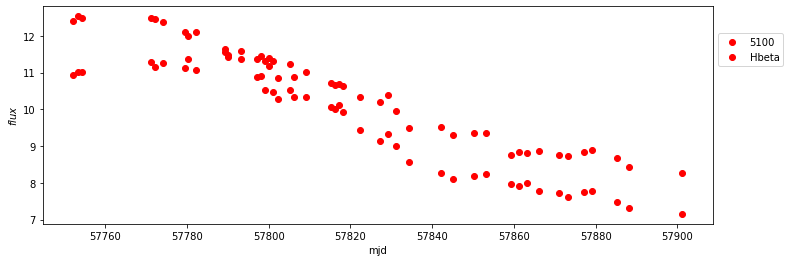

In [12]:
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=Mrk6
ax.scatter(plotdata['mjd'],plotdata['F5100'],color='red',label='5100')
ax.scatter(plotdata['mjd'],plotdata['FHb'],color='red',label='Hbeta')

#ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
#ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
      loc=2,fontsize=10)

#bottom, top = plt.ylim() 
#plt.ylim(top,bottom)

plt.xlabel('mjd')
plt.ylabel(r'$flux$')
#ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
save_lc_img_path='/Users/brettlv/Downloads/Mrk6/Mrk6_5100_Hbeta_lc.png'
if not os.path.exists(save_lc_img_path):   
    plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')


## w1

Mrk 6 


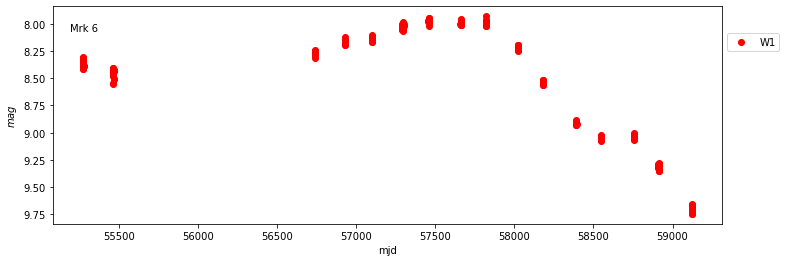

In [17]:

name_test="Mrk 6 "
print(name_test)
search_name=name_test.replace(' ','') 
save_name=name_test

data_test_neo=pd.read_csv('/Users/brettlv/Downloads/Mrk6/wise_%s_neo.csv'%save_name)
data_test_neo=data_test_neo[data_test_neo['w1mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w1sigmpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2sigmpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w1mpro']<15]
data_test_neo=data_test_neo[data_test_neo['w2mpro']<13]  
#data_test_neo=data_test_neo[data_test_neo['w1rchi2']<2]
#data_test_neo=data_test_neo[data_test_neo['w2rchi2']<2]

data_test_neo=data_test_neo[data_test_neo['qual_frame']>0]
#print(len(data_test_neo))
data_test_neo=(data_test_neo.loc[:, ['mjd', 'w1mpro','w2mpro',
                             'w1sigmpro','w2sigmpro',
                             ]].sort_values('mjd'))

data_test_neo=data_test_neo.reset_index(drop=True)
#print(data_test_neo.columns)

data_test_mep=pd.read_csv('/Users/brettlv/Downloads/Mrk6/wise_%s_mep.csv'%save_name)
data_test_mep=data_test_mep[data_test_mep['w1mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w1sigmpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2sigmpro_ep'].notnull()]
#data_test_mep=data_test_mep[data_test_mep['qual_frame']>5]
data_test_mep=data_test_mep[data_test_mep['qi_fact']>0]
data_test_mep=data_test_mep[data_test_mep['saa_sep']>0]

#print(len(data_test_mep))
data_test_mep=(data_test_mep.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                                     'w1sigmpro_ep','w2sigmpro_ep',
                                     ]].sort_values('mjd'))

data_test_mep=data_test_mep.reset_index(drop=True)
#print(data_test_mep.columns)
save_lc_img_path='/Users/brettlv/Downloads/Mrk6/WISE_CLAGN_lc_w1_%s.png'%save_name
if not os.path.exists(save_lc_img_path):

    fig = plt.figure(figsize=(12,4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)

    ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
    ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')


    #ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
    #ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
          loc=2,fontsize=10)

    bottom, top = plt.ylim() 
    plt.ylim(top,bottom)

    plt.xlabel('mjd')
    plt.ylabel(r'$mag$')

    ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
    plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.semilogy()    


## ztf

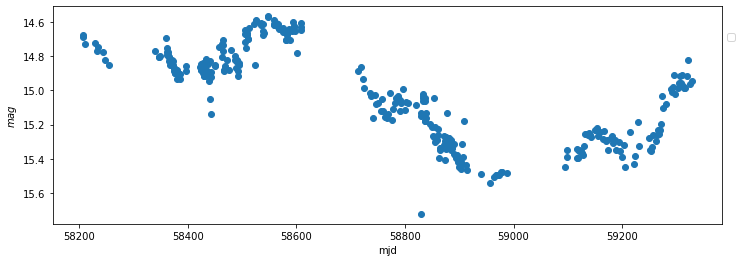

In [40]:
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

ztf_hdl=fits.open('/Users/brettlv/Downloads/Mrk6/858103200005784lc.fits')
ztf_data=ztf_hdl[1].data
plt.scatter(ztf_data['mjd'],ztf_data['mag'])

#ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
#ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
      loc=2,fontsize=10)

bottom, top = plt.ylim() 
plt.ylim(top,bottom)

plt.xlabel('mjd')
plt.ylabel(r'$mag$')

#ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
save_lc_img_path='/Users/brettlv/Downloads/Mrk6/ztf_lc_w1_%s.png'%save_name

plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')


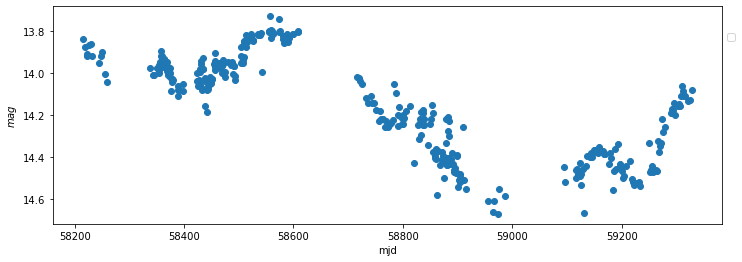

In [41]:
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

ztf_hdl=fits.open('/Users/brettlv/Downloads/Mrk6/858203200030764lc.fits')
ztf_data=ztf_hdl[1].data
plt.scatter(ztf_data['mjd'],ztf_data['mag'])

#ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
#ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
      loc=2,fontsize=10)

bottom, top = plt.ylim() 
plt.ylim(top,bottom)

plt.xlabel('mjd')
plt.ylabel(r'$mag$')

#ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
save_lc_img_path='/Users/brettlv/Downloads/Mrk6/ztf_lc_w1_%s.png'%save_name

plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
